## 練習如何改善模型的學習效果
- 增加 epoch (由20--->200-->2000)
- 增加隱藏層和神經元 (由一層加到三層)
- 增加訓練資料集 (由1000-->10000)


In [1]:
# 補充：預備知識

import numpy as np

a = np.array([[40, 10, 20, 30], [50, 20, 30, 20], [20, 30, 30, 40]])
np.mean(a, axis=1)

array([25., 30., 30.])

In [2]:
import tensorflow as tf
import numpy as np

# 自訂函式：產生資料集
def CreateDatasets(high, iNum, iArraySize):
  x_train = np.random.random((iNum, iArraySize)) * float(high)
  y_train = np.mean(x_train, axis=1).astype(int)  # 每一筆的平均值，再取整數
  return x_train, y_train, tf.keras.utils.to_categorical(y_train, num_classes=(high))

# 自訂函式：顯示資料
def show(x, y, y2, num=-1):
    if(num==-1): num = len(x)
    for i in range(num):
	    print(x[i], np.average(x[i]), y[i], y2[i])  # x 的各個輸入，平均數，y 值，y的onehot 並列比較

category = 10  # 分成幾類
dim = 4  # 輸入的個數

num_train = 1000
num_test = 50

x_train, y_train, y_train_onehot = CreateDatasets(category, num_train, dim) # 建立全部1000個二維的訓練特徵值X因，而訓練結果Y 有10種答案
show(x_train, y_train, y_train_onehot, 10)  # 列出10筆查看


[7.96934573 3.69617828 8.11036743 0.90346795] 5.16983984953199 5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[7.80940682 2.37517707 8.92494938 0.88475757] 4.998572707766576 4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.83913035 2.43383454 9.55655774 6.84486134] 5.918595993233005 5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.04486239 3.43137504 0.88572366 0.54317532] 1.2262841003828584 1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.27344294 8.60664795 4.28730191 6.55346441] 4.930214301548756 4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.73214156 0.8159323  8.0640914  5.29407993] 3.9765612978701617 3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[3.92124827 2.48461022 0.84441495 2.29915529] 2.387357181850743 2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5.10632649 4.37040272 4.82744017 4.02209039] 4.581564940259934 4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.14511966 1.98729692 9.48043646 1.0848974 ] 3.9244376109600325 3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.76311829 4.37466831 6.12646404 3.04532565] 3.827394071577235 3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [3]:
# del model  # 重新訓練時要先刪除模型

# 建立模型
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu, input_dim=dim))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(units=category, activation=tf.nn.softmax ))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [4]:
# 訓練
history = model.fit(x_train, y_train_onehot, epochs=20, batch_size=128, verbose=0)


## 檢查訓練過程

In [5]:
# 查看 history
print(history.history)
print(history.history.keys())
print(len(history.history['loss']))

{'loss': [2.2888295650482178, 2.1128644943237305, 2.0123143196105957, 1.9040981531143188, 1.8406060934066772, 1.7956664562225342, 1.7754706144332886, 1.7584309577941895, 1.7432290315628052, 1.7332592010498047, 1.724098563194275, 1.713000774383545, 1.7060550451278687, 1.6973696947097778, 1.6902514696121216, 1.6852623224258423, 1.6730248928070068, 1.6679538488388062, 1.6575158834457397, 1.6496237516403198], 'accuracy': [0.19200000166893005, 0.26600000262260437, 0.26100000739097595, 0.2770000100135803, 0.29600000381469727, 0.3089999854564667, 0.3109999895095825, 0.3179999887943268, 0.3190000057220459, 0.32100000977516174, 0.32899999618530273, 0.33799999952316284, 0.3409999907016754, 0.34299999475479126, 0.3440000116825104, 0.3310000002384186, 0.3490000069141388, 0.35199999809265137, 0.3479999899864197, 0.3580000102519989]}
dict_keys(['loss', 'accuracy'])
20


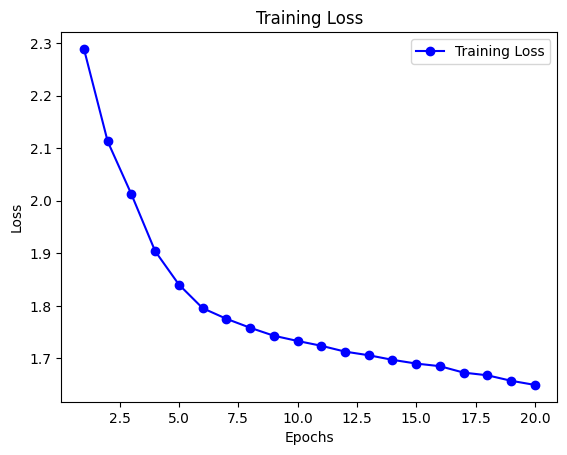

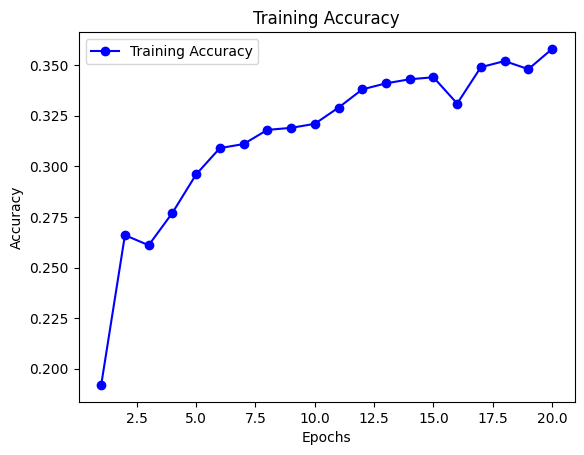

In [6]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt

# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 顯示訓練和正確度
accuracy = history.history["accuracy"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo-", label="Training Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 測試及預測

In [7]:
# 測試
x_test, y_test, y_test_onehot = CreateDatasets(category, num_test, dim)
score = model.evaluate(x_test, y_test_onehot, batch_size=128)
print('score:', score)

predict = model.predict(x_test)
# print('predict:', predict)
print('predict class:')
count = 0
for i in range(num_test):
  print(np.argmax(predict[i]), end =' ')
  if(np.argmax(predict[i])==y_test[i]):
    count = count + 1
print()
print('Y_test\n', y_test)
print('correct=', count, '  rate=', (count/num_test))


1/1 [==============================] - 0s 373ms/step - loss: 1.7725 - accuracy: 0.3400
score: [1.7725237607955933, 0.3400000035762787]
2/2 [==============================] - 0s 8ms/step
predict class:
5 4 5 5 4 5 5 5 5 5 5 5 5 5 4 5 5 4 4 4 4 4 5 4 4 5 5 4 5 3 5 4 4 3 4 5 4 5 5 5 4 4 4 5 4 5 5 5 4 5 
Y_test
 [5 4 6 4 4 7 5 4 3 3 4 5 6 7 3 8 4 4 4 4 5 4 4 4 2 6 8 3 6 1 6 2 5 4 4 6 3
 5 5 5 5 4 3 2 5 6 5 4 5 5]
correct= 17   rate= 0.34
